1. Data input


In [4]:
#importing file1 to colab

from google.colab import files 
uploaded1 = files.upload()

Saving gender_submission.csv to gender_submission (1).csv


In [5]:
#importing file2 to colab

from google.colab import files 
uploaded2 = files.upload()

Saving test.csv to test.csv


In [6]:
#importing file3 to colab

from google.colab import files 
uploaded3 = files.upload()

Saving train.csv to train.csv


In [27]:
#import libraries
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

2. Basic head view of the data


In [44]:
#reading the file1
df1 = pd.read_csv("gender_submission.csv")
df1.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [14]:
#reading the file2
df2 = pd.read_csv("test.csv")
df2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [40]:
df2.drop('PassengerId', axis='columns', inplace=True)
df2.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [41]:
#reading the file3
df3 = pd.read_csv("train.csv")
df3.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [42]:
df3.drop('PassengerId', axis='columns', inplace=True)
df3.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


3. Data description


In [24]:
#3. Data description

df1.describe()

,PassengerId,Survived
count,418.000000,418.000000
mean,1100.500000,0.363636
std,120.810458,0.481622
min,892.000000,0.000000
25%,996.250000,0.000000
50%,1100.500000,0.000000
75%,1204.750000,1.000000
max,1309.000000,1.000000


In [48]:
df2.describe()

,Pclass,Age,SibSp,Parch,Fare
count,418.000000,332.000000,418.000000,418.000000,417.000000
mean,2.265550,30.272590,0.447368,0.392344,35.627188
std,0.841838,14.181209,0.896760,0.981429,55.907576
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,27.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.500000
max,3.000000,76.000000,8.000000,9.000000,512.329200


In [49]:
df3.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [21]:
print(df1.shape)
print(df2.shape)
print(df3.shape)

(418, 2)
(418, 11)
(891, 12)


4. Data summary


In [52]:
dtyp1 = pd.DataFrame(df1.dtypes)
dtyp1

,0
PassengerId,int64
Survived,int64


In [53]:
dtyp2 = pd.DataFrame(df2.dtypes)
dtyp2

,0
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64
Cabin,object
Embarked,object


In [51]:
dtyp3 = pd.DataFrame(df3.dtypes)
dtyp3

,0
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64
Cabin,object


In [50]:
#train data = df3

df3.Survived.value_counts(normalize=True)


0    0.616162
1    0.383838
Name: Survived, dtype: float64

survival rate=38%

5. Univariate analysis


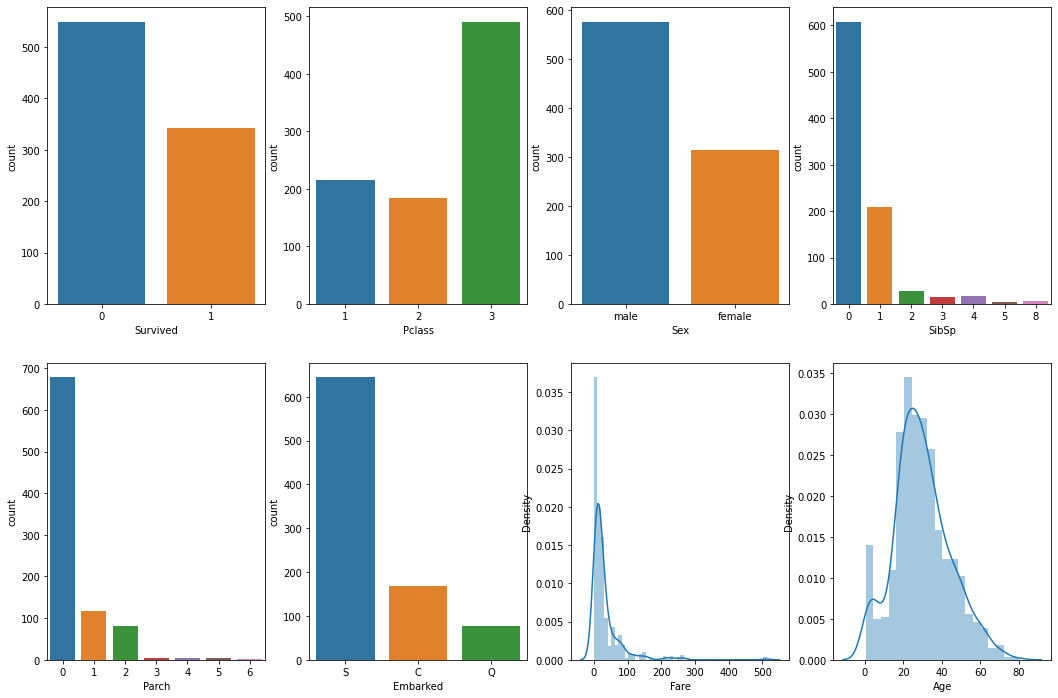

In [46]:
fig, axes = plt.subplots(2, 4, figsize=(18, 12))
sns.countplot('Survived',data=df3,ax=axes[0,0])
sns.countplot('Pclass',data=df3,ax=axes[0,1])
sns.countplot('Sex',data=df3,ax=axes[0,2])
sns.countplot('SibSp',data=df3,ax=axes[0,3])
sns.countplot('Parch',data=df3,ax=axes[1,0])
sns.countplot('Embarked',data=df3,ax=axes[1,1])
sns.distplot(df3['Fare'], kde=True,ax=axes[1,2])
sns.distplot(df3['Age'].dropna(),kde=True,ax=axes[1,3])